# Getting Started with OSMnx
Scott Jenkins, January 2023

In [83]:
import osmnx as ox
import numpy as np
import requests
import pandas as pd
pd.set_option('display.max_columns', None)

ox.utils.citation() # Citation for this package

Citation:

Boeing, G. 2017. OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks. Computers, Environment and Urban Systems, 65, 126-139. https://doi.org/10.1016/j.compenvurbsys.2017.05.004

BibTeX entry for LaTeX users:

@article{boeing_osmnx_2017,
    title = {{OSMnx}: {New} {Methods} for {Acquiring}, {Constructing}, {Analyzing}, and {Visualizing} {Complex} {Street} {Networks}},
    volume = {65},
    doi = {10.1016/j.compenvurbsys.2017.05.004},
    number = {126-139},
    journal = {Computers, Environment and Urban Systems},
    author = {Boeing, Geoff},
    year = {2017}
}


## Dundee

In [2]:
# https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.graph

Dundee_G = ox.graph_from_address('Dundee, Scotland',     # Address
                                 dist = 3000,            # metres
                                 network_type = 'drive') # small places may not be featured.... need to give lat/long instead?

Dundee_G = ox.distance.add_edge_lengths(Dundee_G, precision=3, edges=None)
# This creates a geodf of osm in an xml file
# See also: graph from point, from place, from bbox, from polygon

### Plot

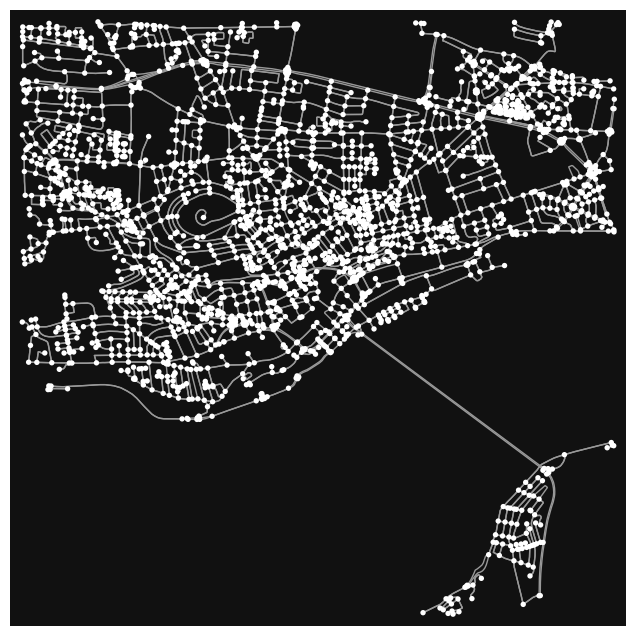

In [3]:
# Now, to plot...
ox.plot_graph(Dundee_G);

### Graph Stats

In [4]:
ox.basic_stats(Dundee_G)

{'n': 2477,
 'm': 5721,
 'k_avg': 4.619297537343561,
 'edge_length_total': 489056.772999997,
 'edge_length_avg': 85.48449099807674,
 'streets_per_node_avg': 2.628986677432378,
 'streets_per_node_counts': {0: 0,
  1: 567,
  2: 15,
  3: 1672,
  4: 218,
  5: 4,
  6: 0,
  7: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2289059345983044,
  2: 0.006055712555510699,
  3: 0.6750100928542592,
  4: 0.08800968914008882,
  5: 0.0016148566814695195,
  6: 0.0,
  7: 0.0004037141703673799},
 'intersection_count': 1910,
 'street_length_total': 273259.05199999927,
 'street_segment_count': 3213,
 'street_length_avg': 85.04794646747565,
 'circuity_avg': 0.9999998731845354,
 'self_loop_proportion': 0.003734827264239029}

### Bearing/Orientation Graph

In [5]:
# Add the edge directions to the undirected graph
Dundee_G = ox.add_edge_bearings(ox.get_undirected(Dundee_G))

In [6]:
# Calculate Entropy
Dundee_entropy = ox.bearing.orientation_entropy(Dundee_G, num_bins=36, min_length=100, weight=None)
print('Dundee Bearing Entropy:',Dundee_entropy)

Dundee Bearing Entropy: 3.4860078479894625


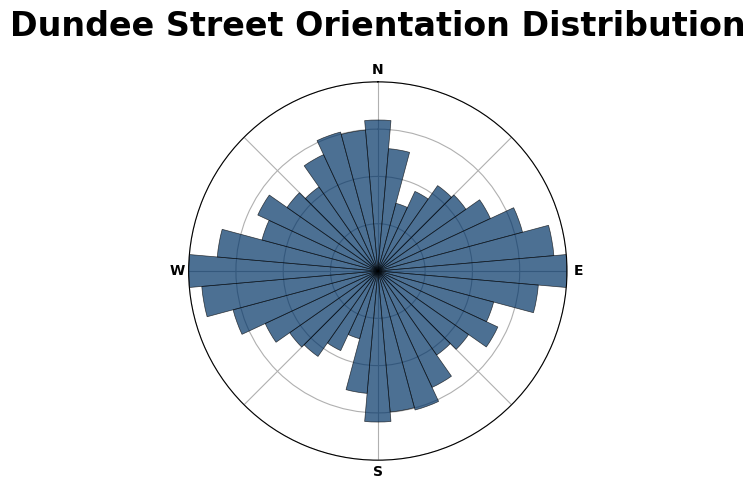

In [7]:
# Plot a polar histogram of a spatial network’s bidirectional edge bearings.
# Ignores self-loop edges as their bearings are undefined.

ox.bearing.plot_orientation(Dundee_G, num_bins=36, min_length=100, weight=None, ax=None, 
                            figsize=(5, 5), area=True, color='#003366', edgecolor='k', 
                            linewidth=0.5, alpha=0.7, title='Dundee Street Orientation Distribution', 
                            title_y=1.1, title_font=None, xtick_font=None);

In [8]:
Dundee_G

### Graph Details
https://networkx.org/documentation/stable/reference/classes/multigraph.html

In [9]:
Dundee_G.graph

{'created_date': '2023-02-25 06:54:32',
 'created_with': 'OSMnx 1.3.0',
 'crs': 'epsg:4326',
 'simplified': True}

In [10]:
# Number of nodes, edges in graph
Dundee_G.order(), Dundee_G.number_of_edges() 

(2477, 3213)

In [11]:
Dundee_G_nodes = list(Dundee_G.nodes)
Dundee_G_nodes[:4] # Example Nodes

[26659260, 26659485, 26659493, 27723534]

In [12]:
# Dictionary of the degrees of the nodes
# dict(Dundee_G.degree) 

In [13]:
# Dictionary of edges: lengths, one way, speed limits, stree names
# Example entry
dict(Dundee_G.edges)[(26659260, 29869762, 0)]

{'osmid': 4697694,
 'ref': 'A92',
 'highway': 'trunk',
 'maxspeed': '70 mph',
 'junction': 'roundabout',
 'oneway': True,
 'reversed': False,
 'length': 54.122,
 'geometry': <LINESTRING (-2.933 56.446, -2.933 56.446, -2.933 56.446, -2.933 56.446, -2....>,
 'from': 26659260,
 'to': 29869762,
 'bearing': 315.2}

### Points of Interest

In [14]:
# ox.config(log_console=True, use_cache=True)

# Find tags and place descriptions here
# https://wiki.openstreetmap.org/wiki/Map_features#Building

tags = {'amenity': ['restaurant', 'pub', 'hotel','fuel','charging_station','taxi'],
        'building': ['hotel','supermarket','church','school','train_station','parking'],
        'tourism': 'hotel'}

gdf = ox.geometries.geometries_from_address('Dundee, Scotland', 
                                           dist=3000, 
                                           tags=tags)
print(gdf.shape)

Dundee_Interest_Points = gdf.reset_index()

(213, 113)


In [15]:
Dundee_Interest_Points = gdf.reset_index()

In [16]:
Dundee_Interest_Points.head()

,element_type,osmid,amenity,created_by,name,geometry,addr:postcode,brand,brand:wikidata,brand:wikipedia,opening_hours,operator,phone,ref:navads,addr:housenumber,addr:street,cuisine,website,addr:city,fhrs:id,level,sport,tourism,addr:suburb,source:addr,addr:housename,toilets,toilets:wheelchair,food,outdoor_seating,smoking,wheelchair,atm,wifi,fuel:electricity,capacity,note,takeaway,diet:vegan,diet:vegetarian,source,delivery,addr:country,contact:facebook,contact:twitter,contact:website,fuel:diesel,fuel:octane_95,payment:credit_cards,payment:debit_cards,self_service,contact:instagram,fax,internet_access,internet_access:fee,rooms,wikidata,brewery,addr:place,operator:wikidata,email,bar,opening_hours:kitchen,lgbtq,authentication:app,authentication:membership_card,fee,motorcar,ref,socket:chademo,socket:chademo:output,socket:type2,socket:type2:output,socket:type2_combo,socket:type2_combo:output,source:date,access,maxstay,opening_hours:covid19,name:en,name:zh,survey:date,parking,payment:app,payment:contactless,nodes,building,capacity:disabled,layer,lit,maxheight,nohousenumber,park_ride,smoothness,surface,denomination,religion,service_times,disused:amenity,ref:GB:uprn,loc_name,shop,isced:level,uprn,service:type,name:pl,payment:american_express,payment:diners_club,payment:discover_card,payment:mastercard,payment:visa,internet_access:operator,internet_access:ssid,ways,type
0,node,289675364,pub,Potlatch 0.10b,Ross's Bar,POINT (-2.95237 56.46857),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,289685119,fuel,NaN,Shell,POINT (-2.96330 56.46350),DD1 3HE,Shell,Q154950,en:Royal Dutch Shell,24/7,Shell,+44 1382 205266,NVDS353_10019622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,289879670,pub,NaN,The Market,POINT (-2.96768 56.46183),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,289898227,restaurant,NaN,Bellini,POINT (-2.96772 56.46116),DD1 3EJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Commercial Street,italian,http://www.legourmetdundee.co.uk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,289898327,restaurant,NaN,Rancho Pancho's,POINT (-2.96700 56.46094),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
Dundee_Interest_Points['amenity'].value_counts()

pub                 68
restaurant          54
place_of_worship    12
charging_station    11
fuel                 8
taxi                 7
parking              4
Name: amenity, dtype: int64

In [26]:
# Nodes vs Ways
pd.pivot_table(Dundee_Interest_Points,index=['element_type','amenity'],values='geometry',aggfunc='count')

geometry
element_type amenity                   
node         charging_station        11
             fuel                     5
             pub                     63
             restaurant              50
             taxi                     6
way          fuel                     3
             parking                  4
             place_of_worship        12
             pub                      5
             restaurant               4
             taxi                     1

In [30]:
# Looks like these Asda stores are duplicated? Unless there are 2 separate fuel stations at the Dundee superstore?
Dundee_Interest_Points[Dundee_Interest_Points['amenity']=='fuel'][['amenity','name','brand', 'geometry','contact:website']]

,amenity,name,brand,geometry,contact:website
1,fuel,Shell,Shell,POINT (-2.96330 56.46350),NaN
10,fuel,Shell,Shell,POINT (-2.97765 56.46097),NaN
37,fuel,Tesco,NaN,POINT (-2.97911 56.45364),NaN
38,fuel,Tesco,Tesco,POINT (-2.99574 56.48227),NaN
95,fuel,NaN,Asda,POINT (-2.98416 56.48737),https://storelocator.asda.com/scotland/dundee/...
179,fuel,Shell,Shell,"POLYGON ((-2.95194 56.48053, -2.95195 56.48046...",NaN
204,fuel,Morrisons,Morrisons,"POLYGON ((-2.95003 56.48540, -2.94995 56.48487...",https://my.morrisons.com/storefinder/1145
205,fuel,Asda,Asda,"POLYGON ((-2.92871 56.47687, -2.92844 56.47687...",https://storelocator.asda.com/scotland/dundee/...


In [31]:
# list(Dundee_Interest_Points.columns)

In [32]:
# Return the charging stations
charging_stations = Dundee_Interest_Points.query("amenity == 'charging_station'").reset_index(drop=True)
charging_stations

,element_type,osmid,amenity,created_by,name,geometry,addr:postcode,brand,brand:wikidata,brand:wikipedia,opening_hours,operator,phone,ref:navads,addr:housenumber,addr:street,cuisine,website,addr:city,fhrs:id,level,sport,tourism,addr:suburb,source:addr,addr:housename,toilets,toilets:wheelchair,food,outdoor_seating,smoking,wheelchair,atm,wifi,fuel:electricity,capacity,note,takeaway,diet:vegan,diet:vegetarian,source,delivery,addr:country,contact:facebook,contact:twitter,contact:website,fuel:diesel,fuel:octane_95,payment:credit_cards,payment:debit_cards,self_service,contact:instagram,fax,internet_access,internet_access:fee,rooms,wikidata,brewery,addr:place,operator:wikidata,email,bar,opening_hours:kitchen,lgbtq,authentication:app,authentication:membership_card,fee,motorcar,ref,socket:chademo,socket:chademo:output,socket:type2,socket:type2:output,socket:type2_combo,socket:type2_combo:output,source:date,access,maxstay,opening_hours:covid19,name:en,name:zh,survey:date,parking,payment:app,payment:contactless,nodes,building,capacity:disabled,layer,lit,maxheight,nohousenumber,park_ride,smoothness,surface,denomination,religion,service_times,disused:amenity,ref:GB:uprn,loc_name,shop,isced:level,uprn,service:type,name:pl,payment:american_express,payment:diners_club,payment:discover_card,payment:mastercard,payment:visa,internet_access:operator,internet_access:ssid,ways,type
0,node,2379902235,charging_station,NaN,NaN,POINT (-2.98185 56.45872),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,4959997685,charging_station,NaN,NaN,POINT (-2.97562 56.46880),NaN,NaN,NaN,NaN,NaN,Chargeplace Scotland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,5578955181,charging_station,NaN,ChargePoint,POINT (-3.01181 56.47283),NaN,ChargePoint,Q5176149,en:ChargePoint,NaN,ChargePoint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q5176149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,6932832172,charging_station,NaN,NaN,POINT (-2.97878 56.45701),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,8109649713,charging_station,NaN,Lochee Charging Hub,POINT (-3.01122 56.47158),NaN,NaN,NaN,NaN,24/7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,node,851626136

There are only 11 points of interest found by osmnx, where is this data from: submitted by the public? Scraped from elsewhere?

## Open Charge Map API

Could use a site such as https://openchargemap.org/site to compare data on EV charging locations. Again, open source..

In [87]:
key = '1e28a717-c78d-4741-b269-663d3fe1ea25'   # test key 

query = f'https://api.openchargemap.io/v3/poi/?key={key}output=json&countrycode=US&maxresults=10'
# query = f'https://api.openchargemap.io/v3/poi/?key={key}output=kml&countrycode=GB&maxresults=500'

response = requests.get(query)
print(response.status_code)      # 403 = forbidden

response_dict = response.json()[0]
response_dict

200


{'DataProvider': {'WebsiteURL': 'http://openchargemap.org',
  'Comments': None,
  'DataProviderStatusType': {'IsProviderEnabled': True,
   'ID': 1,
   'Title': 'Manual Data Entry'},
  'IsRestrictedEdit': False,
  'IsOpenDataLicensed': True,
  'IsApprovedImport': True,
  'License': 'Licensed under Creative Commons Attribution 4.0 International (CC BY 4.0)',
  'DateLastImported': None,
  'ID': 1,
  'Title': 'Open Charge Map Contributors'},
 'OperatorInfo': {'WebsiteURL': 'https://ecamion.com/',
  'Comments': None,
  'PhonePrimaryContact': '+1-855-567-5856',
  'PhoneSecondaryContact': None,
  'IsPrivateIndividual': False,
  'AddressInfo': None,
  'BookingURL': None,
  'ContactEmail': None,
  'FaultReportEmail': None,
  'IsRestrictedEdit': False,
  'ID': 3488,
  'Title': 'Jule Energy'},
 'UsageType': {'IsPayAtLocation': None,
  'IsMembershipRequired': None,
  'IsAccessKeyRequired': None,
  'ID': 1,
  'Title': 'Public'},
 'StatusType': {'IsOperational': True,
  'IsUserSelectable': True,
  '

In [88]:
response_dict.keys()

dict_keys(['DataProvider', 'OperatorInfo', 'UsageType', 'StatusType', 'SubmissionStatus', 'UserComments', 'PercentageSimilarity', 'MediaItems', 'IsRecentlyVerified', 'DateLastVerified', 'ID', 'UUID', 'ParentChargePointID', 'DataProviderID', 'DataProvidersReference', 'OperatorID', 'OperatorsReference', 'UsageTypeID', 'UsageCost', 'AddressInfo', 'Connections', 'NumberOfPoints', 'GeneralComments', 'DatePlanned', 'DateLastConfirmed', 'StatusTypeID', 'DateLastStatusUpdate', 'MetadataValues', 'DataQualityLevel', 'DateCreated', 'SubmissionStatusTypeID'])

In [89]:
response_dict.items()

dict_items([('DataProvider', {'WebsiteURL': 'http://openchargemap.org', 'Comments': None, 'DataProviderStatusType': {'IsProviderEnabled': True, 'ID': 1, 'Title': 'Manual Data Entry'}, 'IsRestrictedEdit': False, 'IsOpenDataLicensed': True, 'IsApprovedImport': True, 'License': 'Licensed under Creative Commons Attribution 4.0 International (CC BY 4.0)', 'DateLastImported': None, 'ID': 1, 'Title': 'Open Charge Map Contributors'}), ('OperatorInfo', {'WebsiteURL': 'https://ecamion.com/', 'Comments': None, 'PhonePrimaryContact': '+1-855-567-5856', 'PhoneSecondaryContact': None, 'IsPrivateIndividual': False, 'AddressInfo': None, 'BookingURL': None, 'ContactEmail': None, 'FaultReportEmail': None, 'IsRestrictedEdit': False, 'ID': 3488, 'Title': 'Jule Energy'}), ('UsageType', {'IsPayAtLocation': None, 'IsMembershipRequired': None, 'IsAccessKeyRequired': None, 'ID': 1, 'Title': 'Public'}), ('StatusType', {'IsOperational': True, 'IsUserSelectable': True, 'ID': 50, 'Title': 'Operational'}), ('Submis

I'll stop here. Pleased to have got the API firing, docs are okay, but would take time to break apart this dictionary.

**END**